# Desafío II: ¿Qué es lo que distingue a un Hit?

_Autores_: 
* Manuel Alvarez
* Roberto Traber
* Ramiro Savoie

## Planteo del problema
* Nos proponemos dar respuesta  a una pregunta a una pregunta amplia
* ¿Que es lo que distingue a un Hit?
* Que características tiene, podemos predecirlo?

## Análisis del Dataset

In [100]:
import csv
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns # Categorical Plots
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
# Abrir una terminal de conda y correr la linea de abajo
# conda install -c https://conda.anaconda.org/amueller wordcloud

df = pd.read_csv('data/billboard.csv', encoding='latin=1')

In [101]:
# Verificamos que los datos se hallan importado correctamente.
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Tenemos una muestra de 317 canciones del año 2000.
# Por las fechas, observamos que algunas canciones entraron previamente al Billboard 100.
len(df.track)

317

* Se observa que el dataset está compuesto por dos partes: Una con la parte descriptiva de la canción (artista, genero, duración, etc.) y otra con la performance de la misma en el chart de Billboard 100 a lo largo de 76 semanas.
* En la sección de performance hay datos faltantes.
* Los géneros de algunas canciones son incorrectos.

## Corrección de la perfomance

In [103]:
# Rellenamos los ranking faltantes con NA.
# Forma con index
# df.iloc[:,7:]

# Forma con labels
weeks_list = df.loc[:,'x1st.week':].fillna(0)
weeks_list.dtypes

x1st.week       int64
x2nd.week     float64
x3rd.week     float64
x4th.week     float64
x5th.week     float64
x6th.week     float64
x7th.week     float64
x8th.week     float64
x9th.week     float64
x10th.week    float64
x11th.week    float64
x12th.week    float64
x13th.week    float64
x14th.week    float64
x15th.week    float64
x16th.week    float64
x17th.week    float64
x18th.week    float64
x19th.week    float64
x20th.week    float64
x21st.week    float64
x22nd.week    float64
x23rd.week    float64
x24th.week    float64
x25th.week    float64
x26th.week    float64
x27th.week    float64
x28th.week    float64
x29th.week    float64
x30th.week    float64
               ...   
x47th.week    float64
x48th.week    float64
x49th.week    float64
x50th.week    float64
x51st.week    float64
x52nd.week    float64
x53rd.week    float64
x54th.week    float64
x55th.week    float64
x56th.week    float64
x57th.week    float64
x58th.week    float64
x59th.week    float64
x60th.week    float64
x61st.week

In [104]:
# Normalización del tipo de datos del atributo x1st.week
weeks_list['x1st.week'] = weeks_list['x1st.week'].astype(float)

In [105]:
# Construimos un nuevo dataframe con los datos corregidos
track_list = df.loc[:,:'date.peaked']
dataframe = track_list.join(weeks_list)
dataframe.dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week          float64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.week         float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
                    ...   
x47th.week         float64
x48th.week         float64
x49th.week         float64
x50th.week         float64
x51st.week         float64
x52nd.week         float64
x

## Corrección de los géneros

In [106]:
# Generamos un nuevo dataframe con los metadatos obtenidos a partir de la API de Spotify
spotify_metadata_dataframe = pd.read_csv('spotify/spotify-metadata.csv')
# Chequeamos que se hayan importado correctamente.
spotify_metadata_dataframe.head()

,spotify.genre,artist.id,artist.image
0,pop,spotify:artist:1Y8cdNmUJH7yBTd9yOvr5i,https://i.scdn.co/image/09e0720e919c908765aa64...
1,rock,spotify:artist:6GI52t8N5F02MxU0g5U69P,https://i.scdn.co/image/9d7f889a472b254993c171...
2,pop rock,spotify:artist:3NRFinRTEqUCfaTTZmk8ek,https://i.scdn.co/image/02c28d987084927abb2754...
3,pop,spotify:artist:6tbjWDEIzxoDsBA1FuhfPW,https://i.scdn.co/image/e49c3d4c0607fe0a35c45d...
4,pop,spotify:artist:1l7ZsJRRS8wlW3WfJfPfNS,https://i.scdn.co/image/73fcc215af53b21e738e94...


In [107]:
len(spotify_metadata_dataframe)

317

In [108]:
# Insertamos los generos como una nueva columna en el dataframe
dataframe.insert(4, 'spotify.genre', spotify_metadata_dataframe['spotify.genre'])

In [109]:
# Insertamos el ID de Spotify como una nueva columna
dataframe.insert(3, 'artist.id', spotify_metadata_dataframe['artist.id'])

In [110]:
# Insertamos la imagen principal de Spotify como una nueva columna
dataframe.insert(4, 'artist.image', spotify_metadata_dataframe['artist.image'])

In [111]:
# Pasamos todos los generos originales del dataset a minusculas para poder compararlos.
dataframe['genre'] = dataframe['genre'].transform(lambda x: x.lower())

# En los artistas que no encontramos en Spotify dejamos el genero original del Dataset.
dataframe['spotify.genre'].fillna(value=dataframe['genre'], inplace=True)

Para facilitar la visualización y el análisis, agregamos algunas columnas nuevas

In [112]:
# Añadimos una columna al dataframe que contiene la diferencia en días entre que entra hasta que toca el pico
dataframe.insert(8, 'Diff', pd.to_datetime(dataframe['date.peaked']) - pd.to_datetime(dataframe['date.entered']))
dataframe['Diff'] = dataframe['Diff'].transform(lambda x: x.days)

In [113]:
# Generamos una nueva columna con el nombre del artista formateado.
dataframe.insert(1, 'artist', dataframe['artist.inverted'].transform(lambda artist: ' '.join(artist.replace("'","").split(',')[::-1]).strip()))

In [114]:
# Añadimos una nueva columna con el nombre del artista más el nombre de la canción
dataframe.insert(3, 'artist.track', dataframe['artist'] + ' - ' + dataframe['track'])

In [115]:
# Agregamos una nueva variable con la duración de las canciones como TimeDelta
from datetime import datetime, timedelta
dataframe.insert(5, 'duration', dataframe['time'].transform(lambda time: timedelta(minutes=datetime.strptime(time,"%M:%S").minute, seconds=datetime.strptime(time,"%M:%S").second)))

In [116]:
# convertimos la duracion a segundos y lo añadimos a una nueva columna para poder trabajarla mejor en gráficos
def convert_time(s):
        m, s = map(int, s.split(':'))
        return int(m*60 + s)
dataframe['durationseconds'] = dataframe['time'].apply(convert_time)

## Análisis de los número 1

In [117]:
# Obtenemos las canciones que alcanzaron alguna vez el numero 1
number_one_tracks = dataframe[(dataframe.loc[:,'x1st.week':] == 1).any(axis=1)]
number_one_tracks

,year,artist,artist.inverted,artist.track,track,duration,artist.id,artist.image,time,spotify.genre,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,durationseconds
0,2000,Destinys Child,Destiny's Child,Destinys Child - Independent Women Part I,Independent Women Part I,00:03:38,spotify:artist:1Y8cdNmUJH7yBTd9yOvr5i,https://i.scdn.co/image/09e0720e919c908765aa64...,3:38,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218
1,2000,Santana,Santana,"Santana - Maria, Maria","Maria, Maria",00:04:18,spotify:artist:6GI52t8N5F02MxU0g5U69P,https://i.scdn.co/image/9d7f889a472b254993c171...,4:18,rock,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258
2,2000,Savage Garden,Savage Garden,Savage Garden - I Knew I Loved You,I Knew I Loved You,00:04:07,spotify:artist:3NRFinRTEqUCfaTTZmk8ek,https://i.scdn.co/image/02c28d987084927abb2754...,4:07,pop rock,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247
3,2000,Madonna,Madonna,Madonna - Music,Music,00:03:45,spotify:artist:6tbjWDEIzxoDsBA1FuhfPW,https://i.scdn.co/image/e49c3d4c0607fe0a35c45d...,3:45,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225
4,2000,Christina Aguilera,"Aguilera, Christina",Christina Aguilera - Come On Over Baby (All I ...,Come On Over Baby (All I Want Is You),00:03:38,spotify:artist:1l7ZsJRRS8wlW3WfJfPfNS,https://i.scdn.co/image/73fcc215af53b21e738e94...,3:38,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218
5,2000,Janet,Janet,Janet - Doesn't Really Matter,Doesn't Really Matter,00:04:17,spotify:artist:4qwGe91Bz9K2T8jXTZ815W,https://i.scdn.co/image/865e7c8d46c494aeb926c6...,4:17,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257
6,2000,Destinys Child,Destiny's Child,Destinys Child - Say My Name,Say My Name,00:04:31,spotify:artist:1Y8cdNmUJH7yBTd9yOvr5i,https://i.scdn.co/image/09e0720e919c908765aa64...,4:31,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271
7,2000,Enrique Iglesias,"Iglesias, Enrique",Enrique Iglesias - Be With You,Be With You,00:03:36,spotify:artist:7qG3b048QCHVRO5Pv1T5lw,https://i.scdn.co/image/b9ba677eff8e8e1d153446...,3:36,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216
8,2000,Sisqo,Sisqo,Sisqo - Incomplete,Incomplete,00:03:52,spotify:artist:6x9QLdzo6eBZxJ1bHsDkjg,https://i.scdn.co/image/65c4f2d897d65c2236ddc7...,3:52,r&b,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232
9,2000,Lonestar,Lonestar,Lonestar - Amazed,Amazed,00:04:25,spotify:artist:3qbnxnvUqR14MJ9g8QwZJK,https://i.scdn.co/image/4461d0d364a545ab2b00ac...,4:25,country,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,265


In [118]:
# Generamos un HTML con las imagenes de los artistas que alcanzaron el Top 1
def get_images_html(images_series):
    images_html = ""
    for artist in images_series:
        if str(artist) != 'nan':
            images_html += '<div class="img" style="background-image:url(\'' + str(artist) + '\');"></div>\n\t\t\t'
    return images_html        

def fill_template(images_html):
    html_template = """
    <html>
        <head>
            <title>Billboard TOP artists</title>
            <style type="text/css">
                .img {
                    position: relative;
                    float: left;
                    width: 200px;
                    height: 200px;
                    background-position: 50% 50%;
                    background-repeat: no-repeat;
                    background-size: cover;
                }
            </style>		
        </head>
        <body>
            <div id="artists-container">
                %s
            </div>
        </body>
    </html>
    """ % (images_html)
    
    return html_template

html_file = open("output/artists-top1.html","w")
html_file.write(fill_template(get_images_html(number_one_tracks['artist.image'])))
html_file.close()

In [119]:
# All artists HTML
# html_file = open("output/all-artists.html","w")
# html_file.write(fill_template(get_images_html(dataframe['artist.image'])))
# html_file.close()

In [120]:
# Obtenemos las canciones que alcanzaron el top 10
top_ten_tracks = dataframe[((dataframe.loc[:,'x1st.week':] > 0) & (dataframe.loc[:,'x1st.week':] <= 10)).any(axis=1)]
top_ten_tracks

,year,artist,artist.inverted,artist.track,track,duration,artist.id,artist.image,time,spotify.genre,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,durationseconds
0,2000,Destinys Child,Destiny's Child,Destinys Child - Independent Women Part I,Independent Women Part I,00:03:38,spotify:artist:1Y8cdNmUJH7yBTd9yOvr5i,https://i.scdn.co/image/09e0720e919c908765aa64...,3:38,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218
1,2000,Santana,Santana,"Santana - Maria, Maria","Maria, Maria",00:04:18,spotify:artist:6GI52t8N5F02MxU0g5U69P,https://i.scdn.co/image/9d7f889a472b254993c171...,4:18,rock,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258
2,2000,Savage Garden,Savage Garden,Savage Garden - I Knew I Loved You,I Knew I Loved You,00:04:07,spotify:artist:3NRFinRTEqUCfaTTZmk8ek,https://i.scdn.co/image/02c28d987084927abb2754...,4:07,pop rock,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247
3,2000,Madonna,Madonna,Madonna - Music,Music,00:03:45,spotify:artist:6tbjWDEIzxoDsBA1FuhfPW,https://i.scdn.co/image/e49c3d4c0607fe0a35c45d...,3:45,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225
4,2000,Christina Aguilera,"Aguilera, Christina",Christina Aguilera - Come On Over Baby (All I ...,Come On Over Baby (All I Want Is You),00:03:38,spotify:artist:1l7ZsJRRS8wlW3WfJfPfNS,https://i.scdn.co/image/73fcc215af53b21e738e94...,3:38,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218
5,2000,Janet,Janet,Janet - Doesn't Really Matter,Doesn't Really Matter,00:04:17,spotify:artist:4qwGe91Bz9K2T8jXTZ815W,https://i.scdn.co/image/865e7c8d46c494aeb926c6...,4:17,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257
6,2000,Destinys Child,Destiny's Child,Destinys Child - Say My Name,Say My Name,00:04:31,spotify:artist:1Y8cdNmUJH7yBTd9yOvr5i,https://i.scdn.co/image/09e0720e919c908765aa64...,4:31,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271
7,2000,Enrique Iglesias,"Iglesias, Enrique",Enrique Iglesias - Be With You,Be With You,00:03:36,spotify:artist:7qG3b048QCHVRO5Pv1T5lw,https://i.scdn.co/image/b9ba677eff8e8e1d153446...,3:36,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216
8,2000,Sisqo,Sisqo,Sisqo - Incomplete,Incomplete,00:03:52,spotify:artist:6x9QLdzo6eBZxJ1bHsDkjg,https://i.scdn.co/image/65c4f2d897d65c2236ddc7...,3:52,r&b,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232
9,2000,Lonestar,Lonestar,Lonestar - Amazed,Amazed,00:04:25,spotify:artist:3qbnxnvUqR14MJ9g8QwZJK,https://i.scdn.co/image/4461d0d364a545ab2b00ac...,4:25,country,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,265


In [121]:
html_file = open("output/artists-top10.html","w")
html_file.write(fill_template(get_images_html(top_ten_tracks['artist.image'])))
html_file.close()

In [122]:
# canciones que alcanzaron el numero 1 entre las primeras 21 semanas en la lista
n1t_1_21 = dataframe[((dataframe.loc[:,'x1st.week':] == 1).any(axis=1) ) & ((dataframe.loc['0':,'x1st.week':'x21st.week'] == 1).any(axis=1))]

## Análisis de performance de los Top 1

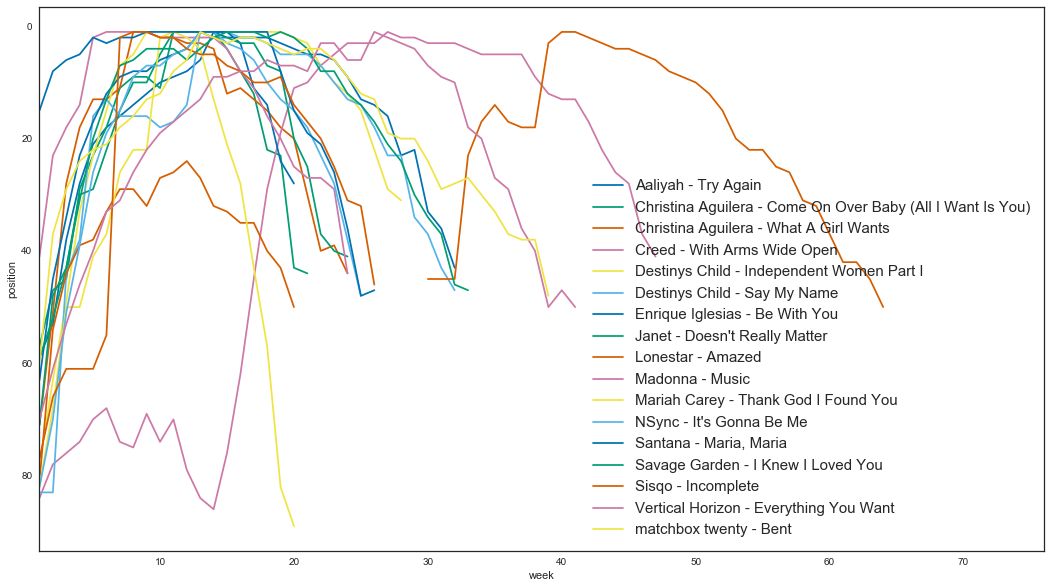

In [123]:
# Módulo para la graficación de la evolución temporal de la posición en el ranking de las canciones que alcanzaron el numero 1
# mostrando las 76 semanas del DataSet
# Para eliminar el mensaje de error que sale al ejecutar uno de los comandos.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data_melted_aw = pd.melt(number_one_tracks, id_vars=['artist.track'], value_vars=number_one_tracks.loc[:,'x1st.week':'x76th.week']) 
data_melted_aw['week'] = data_melted_aw['variable'].str.extract('(\d+)')
data_melted_aw['week'] = data_melted_aw['week'].astype('float64')
data_melted_aw['position'] = data_melted_aw['value'].replace(0, np.nan)
table = data_melted_aw.pivot_table(values = 'position', index='week', columns='artist.track')

# Módulo de graficación
sns.set(style="white", palette="colorblind") # set de seaborn
table.plot(figsize=(18,10))
ax = plt.gca()
ax.invert_yaxis() # invierto el eje Y para que me queden los numero 1 arriba
ax.set(xlabel='week', ylabel='position')
plt.legend(fontsize=15, loc='lower right') # Agrando la leyenda del plot
plt.show()

* Claramente los denominados hits, tienen una tendencia ascendente en su lanzamiento y rápidamente descienden en el chart.
* Observamos que las primeras 21 semanas del Dataset son las más relevantes para el análisis, por lo tanto realizamos un análisis más detallado ahí.

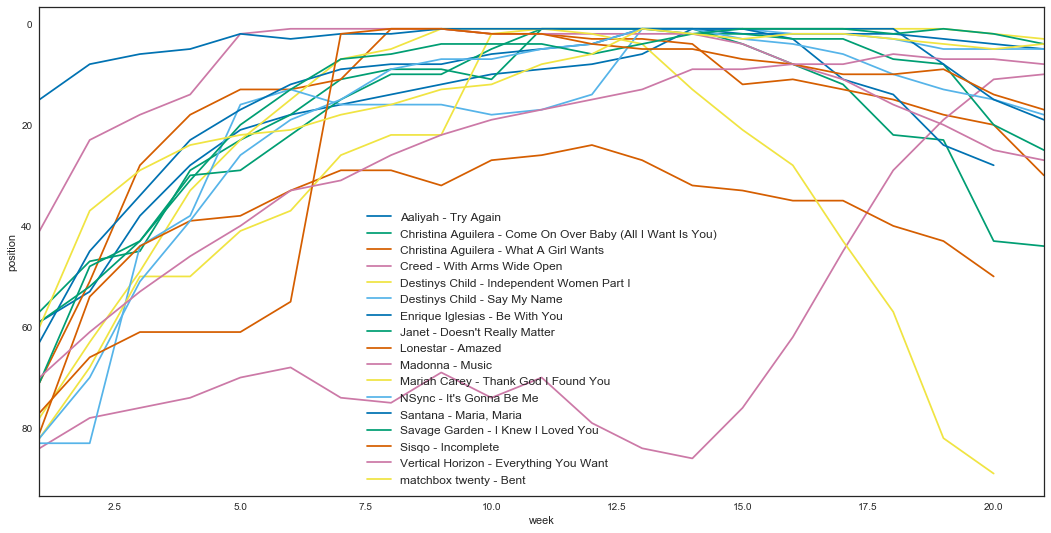

In [124]:
# Módulo para la graficación de la evolución temporal de la posición en el ranking de las canciones que alcanzaron el numero 1
# mostrando las primeras 21 semanas del DataSet

data_melted_21 = pd.melt(number_one_tracks, id_vars=['artist.track'], value_vars=number_one_tracks.loc[:,'x1st.week':'x21st.week']) 
data_melted_21['week'] = data_melted_21['variable'].str.extract('(\d+)')
data_melted_21['week'] = data_melted_21['week'].astype('float64')
data_melted_21['position'] = data_melted_21['value'].replace(0, np.nan)
table = data_melted_21.pivot_table(values = 'position', index='week', columns='artist.track')

# Módulo de graficación
sns.set(style="white", palette="colorblind") # set de seaborn
table.plot(figsize=(18,9))
ax = plt.gca()
ax.invert_yaxis() # invierto el eje Y para que me queden los numero 1 arriba
ax.set(xlabel='week', ylabel='position')
plt.legend(fontsize=12, loc='lower center') # Agrando la leyenda del plot
plt.show()

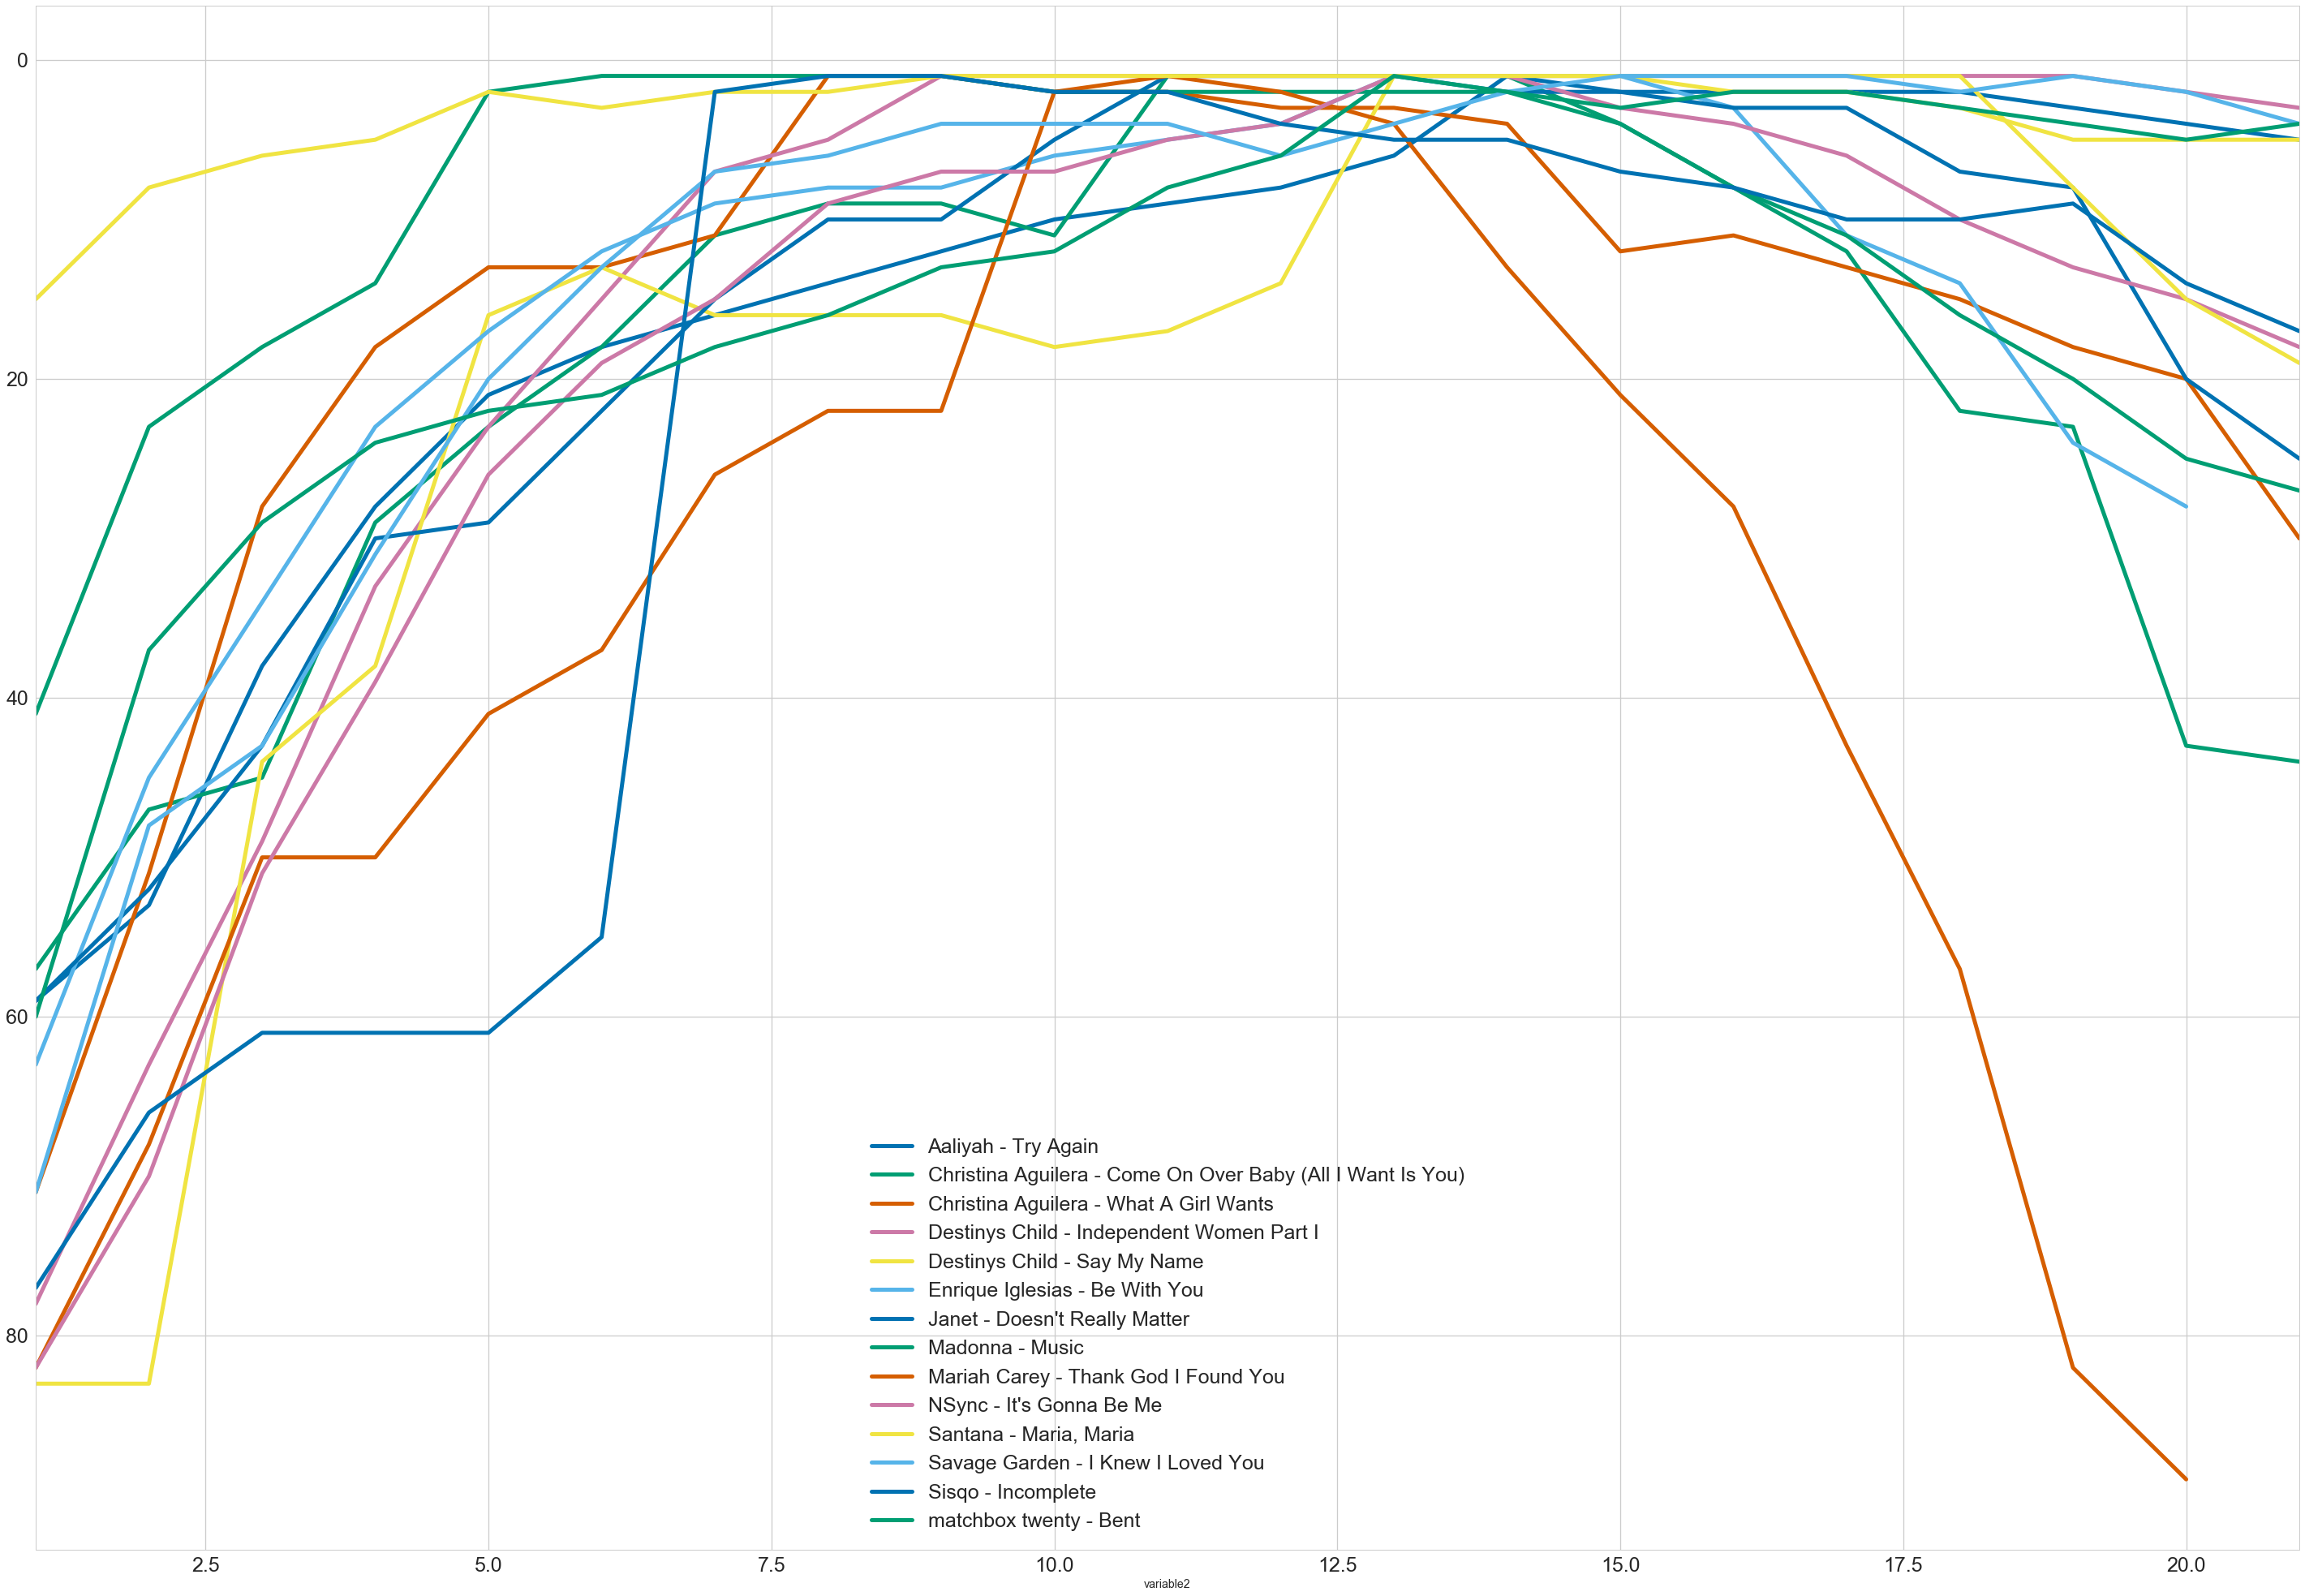

In [125]:
# Módulo para la graficación de la evolución temporal de la posición en el ranking de las canciones que alcanzaron el numero 1
# dentro de las 21 primeras semanas de vida mostrando las primeras 21 semanas del DataSet

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# TODO (robert): Continuar con las graficas
data_melted_n1t_1_21 = pd.melt(n1t_1_21, id_vars=['artist.track'], value_vars=n1t_1_21.loc[:,'x1st.week':'x21st.week']) 

data_melted_n1t_1_21['variable2'] = data_melted_n1t_1_21['variable'].str.extract('(\d+)')
data_melted_n1t_1_21['variable2'] = data_melted_n1t_1_21['variable2'].astype('float64')
data_melted_n1t_1_21['value'] = data_melted_n1t_1_21['value'].replace(0, np.nan)

table = data_melted_n1t_1_21.pivot_table(values = 'value', index='variable2', columns='artist.track')

# Módulo de graficación
paper_rc = {'lines.linewidth': 5}
sns.set(style="whitegrid", palette="colorblind", color_codes=True) # set de seaborn
sns.set_context("talk", rc = paper_rc) # Or notebook, poster or talk
table.plot(figsize=(50, 35), fontsize = 25)
ax = plt.gca()
ax.invert_yaxis() # invierto el eje Y para que me queden los numero 1 arriba
plt.legend(fontsize=25, loc='lower center') # Agrando la leyenda del plot
plt.show()

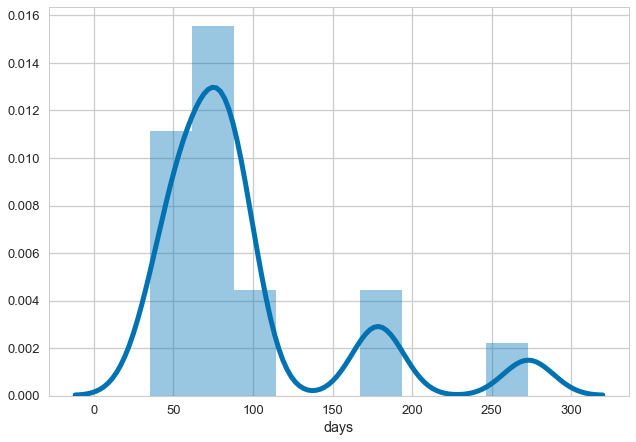

In [126]:
# En este grafico se puede observar que las canciones que tocan el numero 1 lo hacen en
# un periodo de 60 a 90 días aproximadamente
sns.distplot(number_one_tracks['Diff'], axlabel='days');

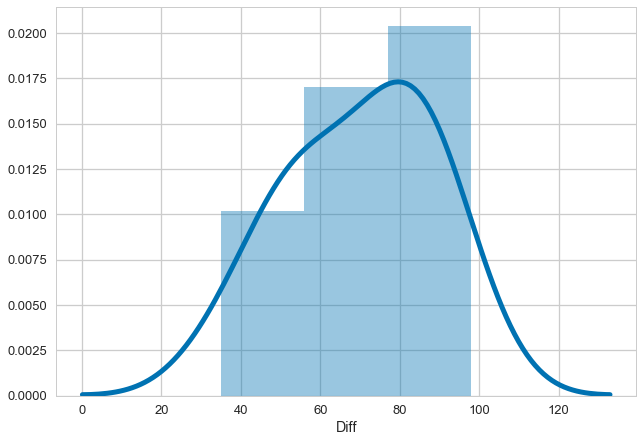

In [127]:
# En este grafico se puede observar que las canciones que tocan el numero 1 en las primeras 21 semanas de vida lo hacen en
# un periodo de 60 a 90 días aproximadamente, pero con un pico en la distribución de 80 días
sns.distplot(n1t_1_21['Diff']);

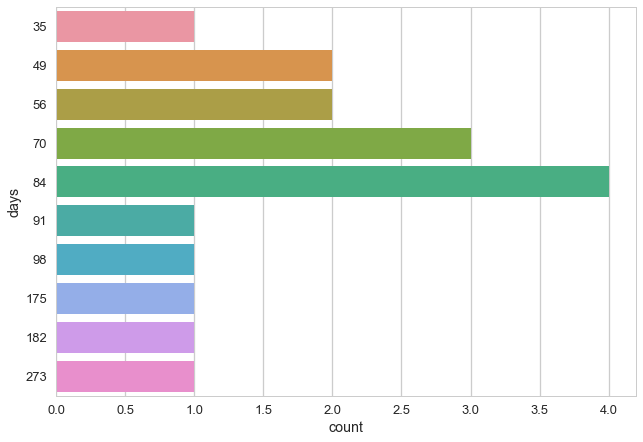

In [128]:
# Como numero de días exacto es a los 84 dias de estar dentro de la lista cuando se toca en numero 1
sns.countplot(y = 'Diff', data = number_one_tracks)
plt.xlabel('count')
plt.ylabel('days');

## Análisis por géneros musicales de los Top 1

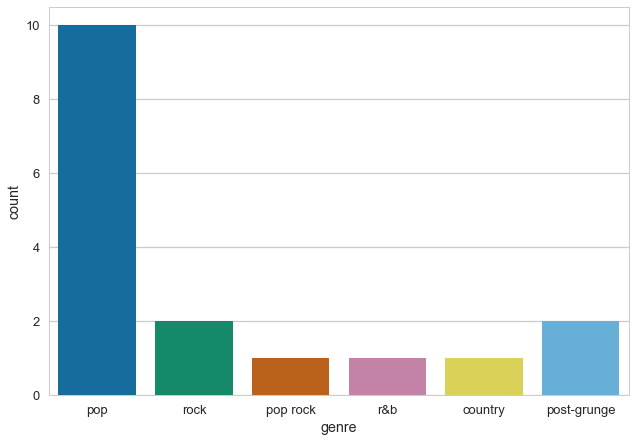

In [129]:
# Vemos que el género musical que más toca el numero 1 es el Pop
sns.countplot(x = 'spotify.genre', data = number_one_tracks);
plt.xlabel('genre')
plt.ylabel('count');

In [130]:
# Vemos ademas que la media de tiempo en llegar al numero 1 para el pop es más baja que para el rock o el post-grunge
# En el caso de R&B hay solo un caso.
table2 = number_one_tracks.pivot_table(values = 'Diff', index = 'spotify.genre', aggfunc='mean', margins=True)
table2

,Diff
spotify.genre,
country,273.000000
pop,69.300000
pop rock,98.000000
post-grunge,129.500000
r&b,49.000000
rock,119.000000
All,94.705882


## Análisis de la duración de los Top 1

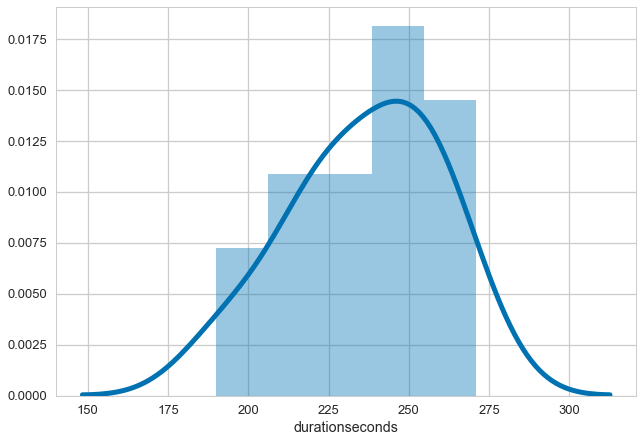

In [131]:
# la duración que más se suele dar en las canciones que tocan el top 1 es de entre unos 240 y 250 segundos (4:00 min - 4:10 min)
sns.distplot(number_one_tracks['durationseconds'], bins = 5);

In [132]:
# 3:49 min de media para pop, la media general es de 3:56
table2 = n1t_1_21.pivot_table(values = 'durationseconds', index = 'spotify.genre', aggfunc='mean', margins=True)
table2

,durationseconds
spotify.genre,
pop,229.000000
pop rock,247.000000
post-grunge,252.000000
r&b,232.000000
rock,258.000000
All,234.214286


## Análisis de palabras de los Top 1

#### 1. Análisis de todas las canciones en Billboard incluyendo artículos y sujetos

In [133]:
#Read DataFrame track field for all songs in the Billboard list
# Data Cleaning
text=df['track'].transform(lambda x: x.lower())

text=text.transform(lambda x: str.replace(x, "(", ""))
text=text.transform(lambda x: str.replace(x, ")", ""))
text=text.transform(lambda x: str.replace(x, "'s", ""))
text=text.transform(lambda x: str.replace(x, "'t", "t"))
text=text.transform(lambda x: str.replace(x, "'", " "))
text=text.transform(lambda x: str.replace(x, "you'", "you"))


all_words_track = []
for track in text:
    all_words_track += track.split()

all_words_joined = ' '.join(all_words_track)

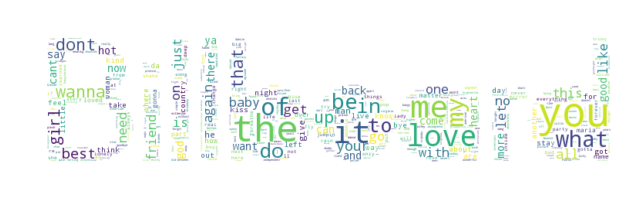

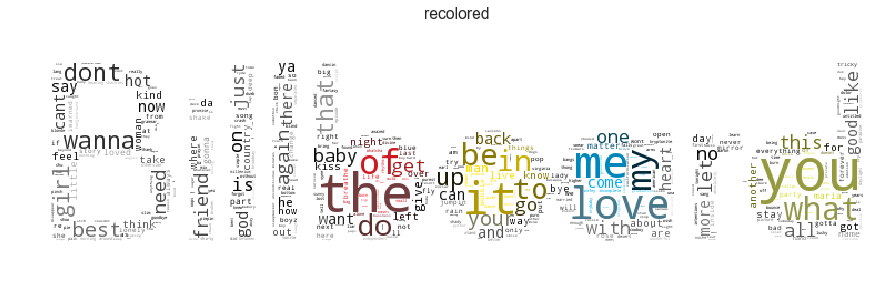

In [134]:
from os import path
from PIL import Image
import numpy as np
from wordcloud.color_from_image import ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS

#search for image to load
music_mask = np.array(Image.open(path.join("img/billboard_icon.png")))
wc = WordCloud(width = 1000, height = 500, background_color="white", max_words=6000,min_font_size=1, mask=music_mask, stopwords=set())
# generate word cloud
wc.generate(all_words_joined)

image_colors = ImageColorGenerator(music_mask)

# store to file
wc.to_file(path.join("output/billboard.png"))
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(15,8))
# recolor wordcloud and show
plt.imshow(wc.recolor(color_func=image_colors))
plt.title("recolored")
plt.axis("off")

plt.show()

In [135]:
#creo un diccionario donde acumulo cada una de las palabras y realizo el conteo de las veces que se repite ordenado por ocurrencia
my_dict = {i:all_words_track.count(i) for i in all_words_track} #agrupo las palabras usadas y las ordeno por ocurrencia
grouped_words = [(k, my_dict[k]) for k in sorted(my_dict, key=my_dict.get, reverse=True)]
print(grouped_words)

[('you', 42), ('i', 40), ('the', 37), ('it', 25), ('me', 25), ('love', 22), ('of', 15), ('my', 14), ('a', 13), ('what', 12), ('be', 11), ('to', 10), ('do', 9), ('in', 9), ('up', 9), ('wanna', 8), ('that', 8), ('dont', 8), ('u', 7), ('your', 7), ('best', 7), ('is', 6), ('this', 6), ('no', 6), ('on', 5), ('baby', 5), ('all', 5), ('with', 5), ('girl', 5), ('again', 5), ('just', 5), ('one', 5), ('get', 5), ('go', 5), ('let', 5), ('m', 5), ('like', 5), ('say', 4), ('god', 4), ('hot', 4), ('more', 4), ('there', 4), ('heart', 4), ('and', 4), ('need', 4), ('ya', 4), ('back', 4), ('cant', 4), ('can', 4), ('want', 3), ('he', 3), ('man', 3), ('give', 3), ('night', 3), ('bye', 3), ('way', 3), ('da', 3), ('country', 3), ('good', 3), ('take', 3), ('think', 3), ('stay', 3), ('about', 3), ('how', 3), ('another', 3), ('where', 3), ('now', 3), ('day', 3), ('friends', 3), ('little', 3), ('kind', 3), ('for', 3), ('got', 3), ('out', 3), ('kiss', 3), ('woman', 3), ('are', 3), ('part', 2), ('loved', 2), ('co

#### 2. Análisis de todas las canciones en Billboard excluyendo artículos y sujetos


In [136]:
text=df['track'].transform(lambda x: x.lower())

all_words_track_2 = []
for track in text:
    all_words_track_2 += track.split()

all_words_joined_2 = ' '.join(all_words_track_2)

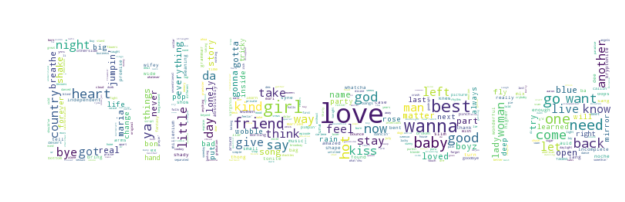

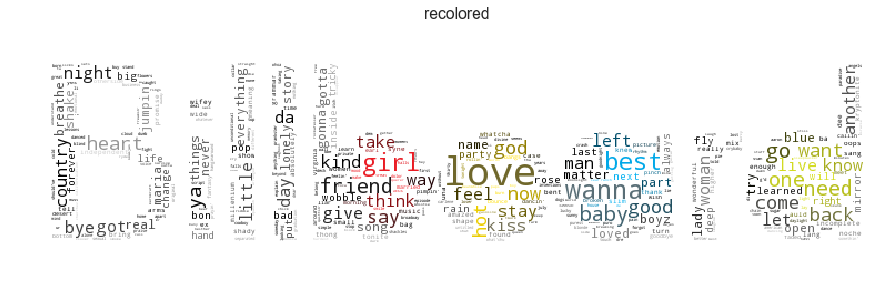

In [137]:
from os import path
from PIL import Image
import numpy as np
from wordcloud.color_from_image import ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS

#search for image to load
music_mask = np.array(Image.open(path.join("img/billboard_icon_2.png")))
wc = WordCloud(width = 1000, height = 500, background_color="white", max_words=6000,min_font_size=1, mask=music_mask, stopwords=None)
# generate word cloud
wc.generate(all_words_joined_2)

image_colors = ImageColorGenerator(music_mask)

# store to file
wc.to_file(path.join("output/billboard_2.png"))
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(15,8))
# recolor wordcloud and show
plt.imshow(wc.recolor(color_func=image_colors))
plt.title("recolored")
plt.axis("off")

plt.show()

#### 2. Análisis de todas las canciones definidas como hits (haber superado el umbral del top 10)


In [138]:
hits = dataframe[((dataframe.loc[:,'x1st.week':] > 0) & (dataframe.loc[:,'x1st.week':] <= 10)).any(axis=1)]
text=hits['track'].transform(lambda x: x.lower())

all_words_track_3 = []
for track in text:
    all_words_track_3 += track.split()

all_words_joined_3 = ' '.join(all_words_track_3)

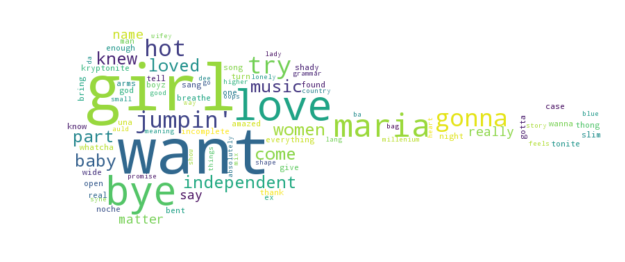

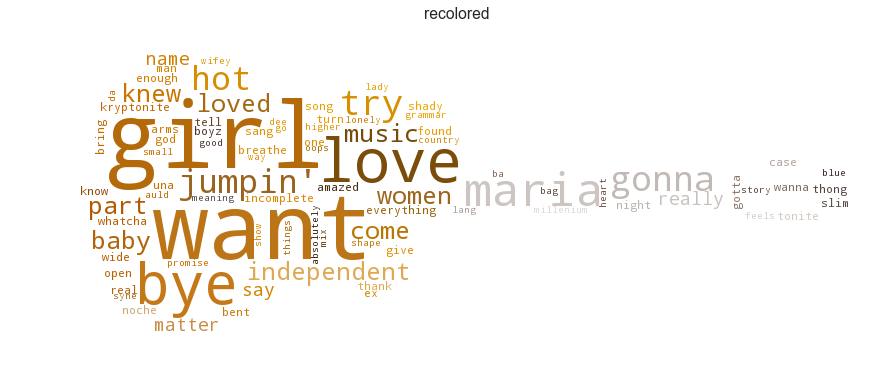

In [139]:
#search for image to load
music_mask = np.array(Image.open(path.join("img/music_icon.png")))
wc = WordCloud(width = 1000, height = 500, background_color="white", max_words=6000,min_font_size=1, mask=music_mask, stopwords=None)
# generate word cloud
wc.generate(all_words_joined_3)

image_colors = ImageColorGenerator(music_mask)

# store to file
wc.to_file(path.join("output/music.png"))
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(15,8))
# recolor wordcloud and show
plt.imshow(wc.recolor(color_func=image_colors))
plt.title("recolored")
plt.axis("off")

plt.show()

#### 3. Análisis de las canciones número 1

In [140]:
text=number_one_tracks['track'].transform(lambda x: x.lower())

all_words_track_4 = []
for track in text:
    all_words_track_4 += track.split()

all_words_joined_4 = ' '.join(all_words_track_4)

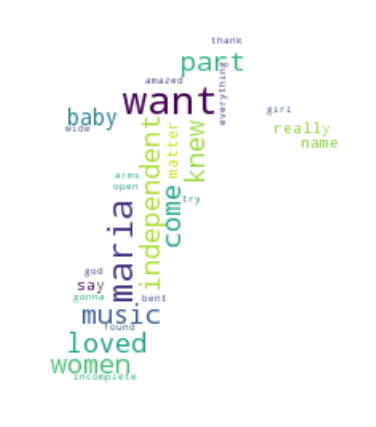

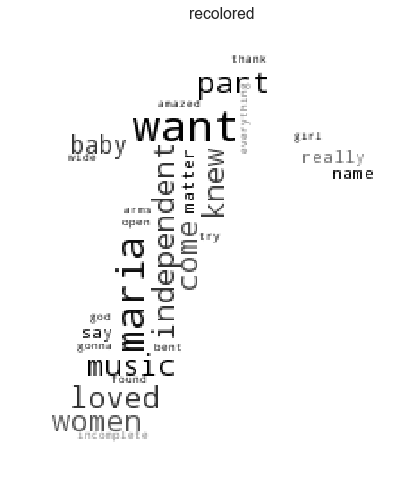

In [141]:
#search for image to load
music_mask = np.array(Image.open(path.join("img/ones_icon.png")))
wc = WordCloud(width = 1000, height = 500, background_color="white", max_words=6000,min_font_size=1, mask=music_mask, stopwords=None)
# generate word cloud
wc.generate(all_words_joined_4)

image_colors = ImageColorGenerator(music_mask)

# store to file
wc.to_file(path.join("output/ones.png"))
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(15,8))
# recolor wordcloud and show
plt.imshow(wc.recolor(color_func=image_colors))
plt.title("recolored")
plt.axis("off")

plt.show()

### Número de Palabras que componen el nombre de la canción

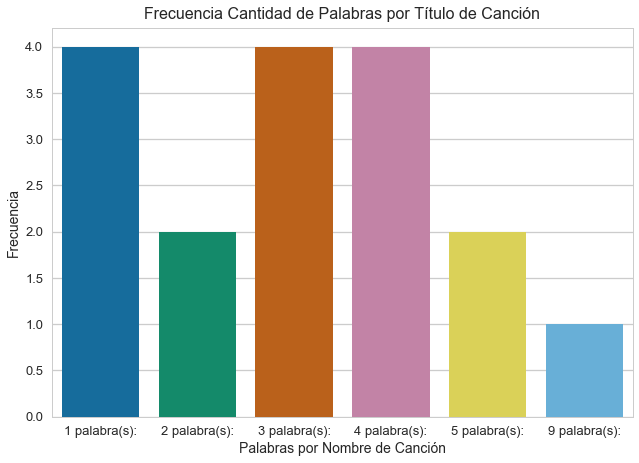

In [142]:
#Conteo del número de palabras que componen el nombre de una canción para los denominados hits.
count = number_one_tracks['track'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' palabra(s):'
count.sort_index(inplace=True)
plot = sns.barplot( x = count.index , y = count, ci=None)

# Agregamos el título.
plot.set_title('Frecuencia Cantidad de Palabras por Título de Canción', fontdict = {'fontsize': 16, 'verticalalignment':'bottom'})

# Ajustamos la leyenda de los ejes.
plot.set_xlabel('Palabras por Nombre de Canción', fontdict = {'fontsize':14})
plot.set_ylabel('Frecuencia', fontdict = {'fontsize':14});

## Conclusiones

_En el año 2000 para ser un Hit en el Billboard The Hot 100 tenías que publicar una canción Pop con las palabras 'Girl want love' de 3:56 y alcanzar el Top #1 entre 60 y 90 días_